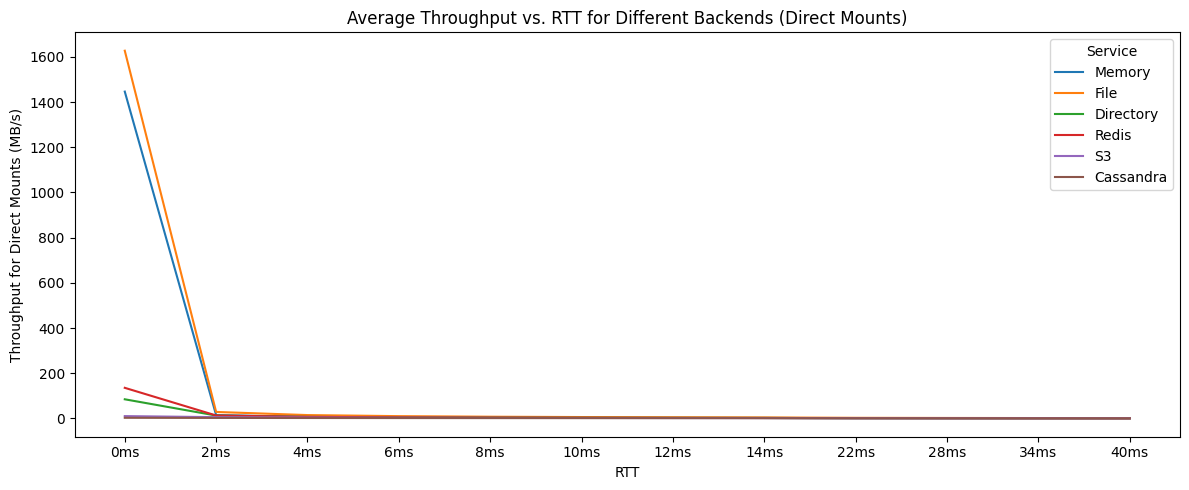

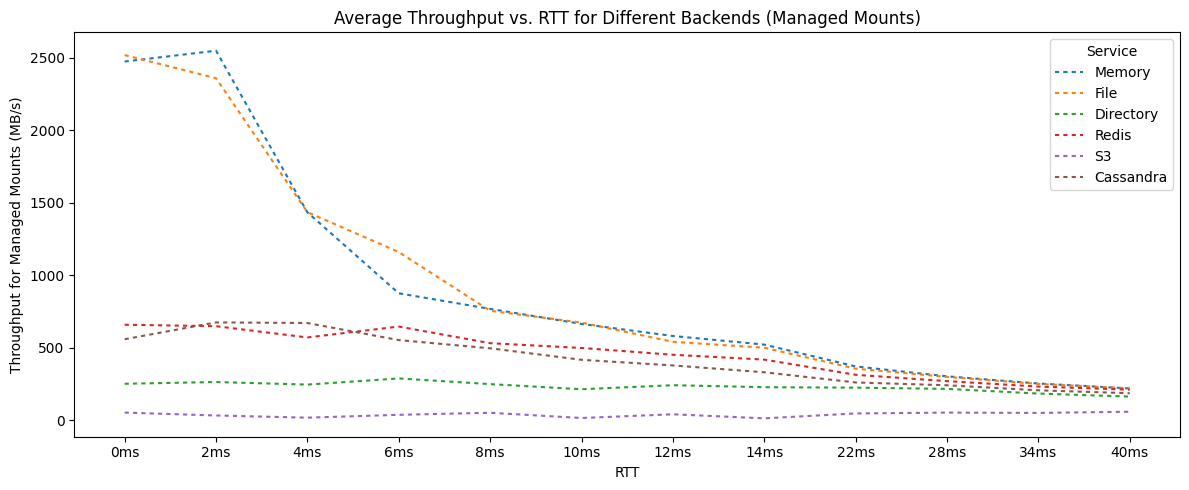

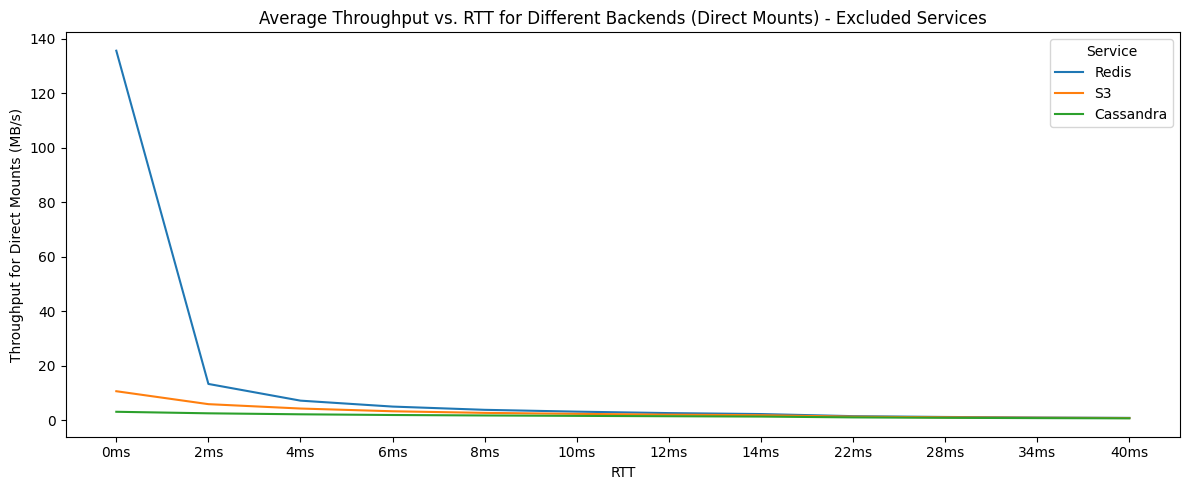

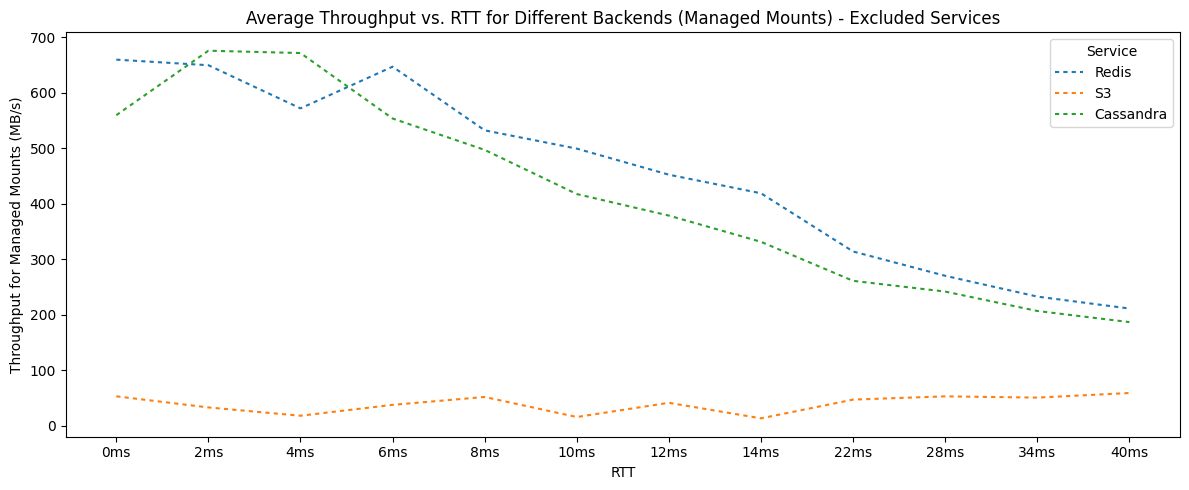

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../bench/throughput-allvar/results.csv')

# Fill the missing values
df['RTT'] = df['RTT'].ffill()
df['Service'] = df['Service'].ffill()

# For Direct Mounts - All services
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='RTT', y='Throughput for Direct Mounts (MB/s)', hue='Service', palette='tab10', errorbar=None)
plt.title('Average Throughput vs. RTT for Different Backends (Direct Mounts)')
plt.legend(title='Service', labels=[service.title() for service in df['Service'].unique()], loc='best')
plt.tight_layout()
plt.show()

# For Managed Mounts - All Services
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='RTT', y='Throughput for Managed Mounts (MB/s)', hue='Service', palette='tab10', errorbar=None, style='Service', dashes=[(2,2) for _ in df['Service'].unique()])
plt.title('Average Throughput vs. RTT for Different Backends (Managed Mounts)')
plt.legend(title='Service', labels=[service.title() for service in df['Service'].unique()], loc='best')
plt.tight_layout()
plt.show()

# Exclude 'file', 'memory', and 'directory' from the data
df_excluded = df[~df['Service'].isin(['file', 'memory', 'directory'])]

# For Direct Mounts - Excluded Services
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_excluded, x='RTT', y='Throughput for Direct Mounts (MB/s)', hue='Service', palette='tab10', errorbar=None)
plt.title('Average Throughput vs. RTT for Different Backends (Direct Mounts) - Excluded Services')
plt.legend(title='Service', labels=[service.title() for service in df_excluded['Service'].unique()], loc='best')
plt.tight_layout()
plt.show()

# For Managed Mounts - Excluded Services
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_excluded, x='RTT', y='Throughput for Managed Mounts (MB/s)', hue='Service', palette='tab10', errorbar=None, style='Service', dashes=[(2,2) for _ in df_excluded['Service'].unique()])
plt.title('Average Throughput vs. RTT for Different Backends (Managed Mounts) - Excluded Services')
plt.legend(title='Service', labels=[service.title() for service in df_excluded['Service'].unique()], loc='best')
plt.tight_layout()
plt.show()